In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import cm

In [2]:
data = pd.read_excel(r'data.xlsx')
data

,Column1,Column2
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
data = np.array(data)
theta = np.zeros((2,1))
alpha = 0.01
iterations = 1500

In [4]:
x = data[:,0]
y = data[:,1]
y = y.reshape((97,1))

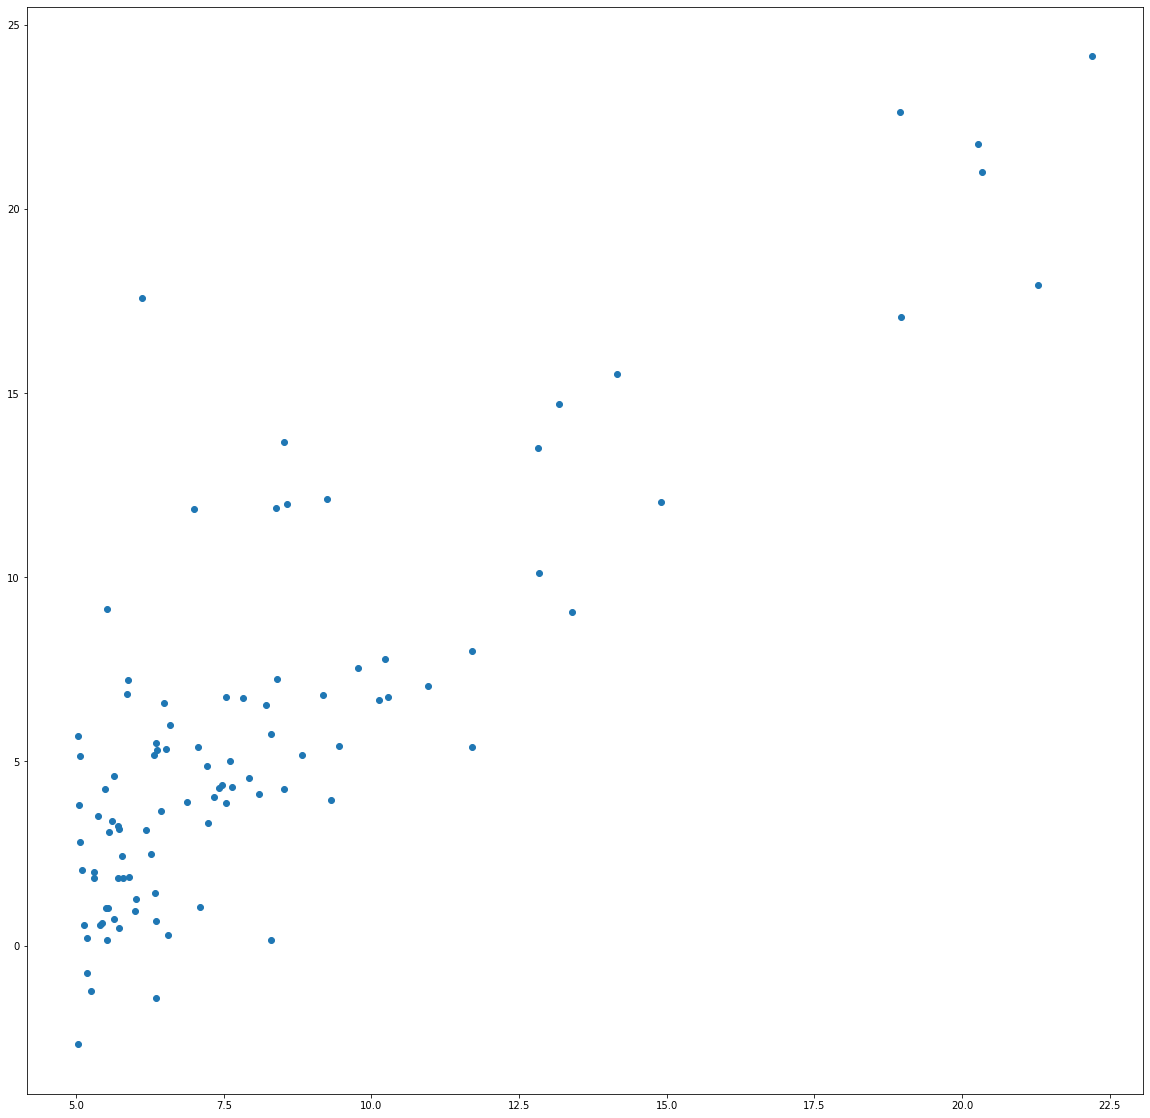

In [5]:
plt.figure(figsize = (20,20))
plt.scatter(x,y)
plt.show()

In [6]:
x = x.reshape((97,1))

In [7]:
X = np.hstack((np.ones(x.shape),x))

In [8]:
def computeCost(X, y, theta):
    m = len(y)
    J = 0
    J = 1/(2*m)*np.sum(((X.dot(theta)) - y)**2)
    return J

In [9]:
computeCost(X, y, theta)

32.072733877455676

In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(1,num_iters+1):
        theta[0,:] = theta[0,:] - (alpha/m)*(X.dot(theta) - y).T.dot(X[:,0])
        theta[1,:] = theta[1,:] - (alpha/m)*(X.dot(theta) - y).T.dot(X[:,1])
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [11]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta trouvée par la method de la descente: ')
print("Theta 0: ",theta[0])
print("Theta 1: ",theta[1])
print(theta.shape)

Theta trouvée par la method de la descente: 
Theta 0:  [-3.63606348]
Theta 1:  [1.16698916]
(2, 1)


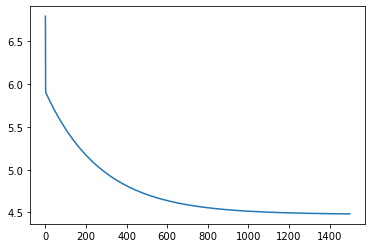

In [12]:
plt.plot(J_history)
plt.show()

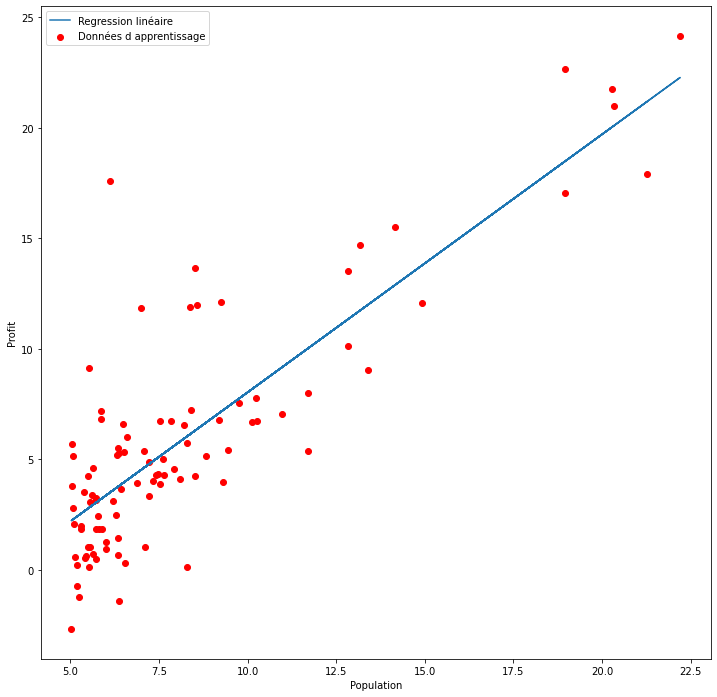

In [13]:
plt.figure(figsize=(12,12))
plt.scatter(x,y, c= 'r', label='Données d apprentissage')
plt.plot(X[:,1], X.dot(theta), label = 'Regression linéaire')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [14]:
predict1 = np.array(([1,3.5]))
predict2 = np.array(([1,7]))
print('Pour une  population = 35,000, le profit prédit est de \n', predict1.dot(theta)*10000)
print('Pour une  population = 70,000, le profit prédit est de \n', predict2.dot(theta)*10000)


Pour une  population = 35,000, le profit prédit est de 
 [4483.98578098]
Pour une  population = 70,000, le profit prédit est de 
 [45328.60631675]


Visualiser J(theta_0, theta_1) ...



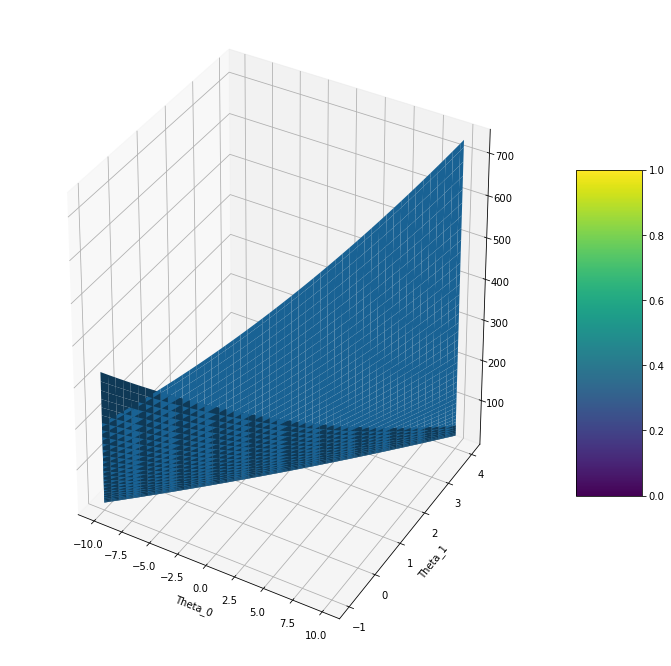

In [15]:
print('Visualiser J(theta_0, theta_1) ...\n')
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        th = np.array([[theta0_vals[i]],[theta1_vals[j]]])
        J_vals[i,j] = computeCost(X, y, th)    
J_vals = J_vals.T
fig, ax = plt.subplots(figsize = (12,12), subplot_kw={"projection": "3d"})
surf = ax.plot_surface(theta0_vals,theta1_vals, J_vals)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('Theta_0')
plt.ylabel('Theta_1')
plt.show()

No handles with labels found to put in legend.


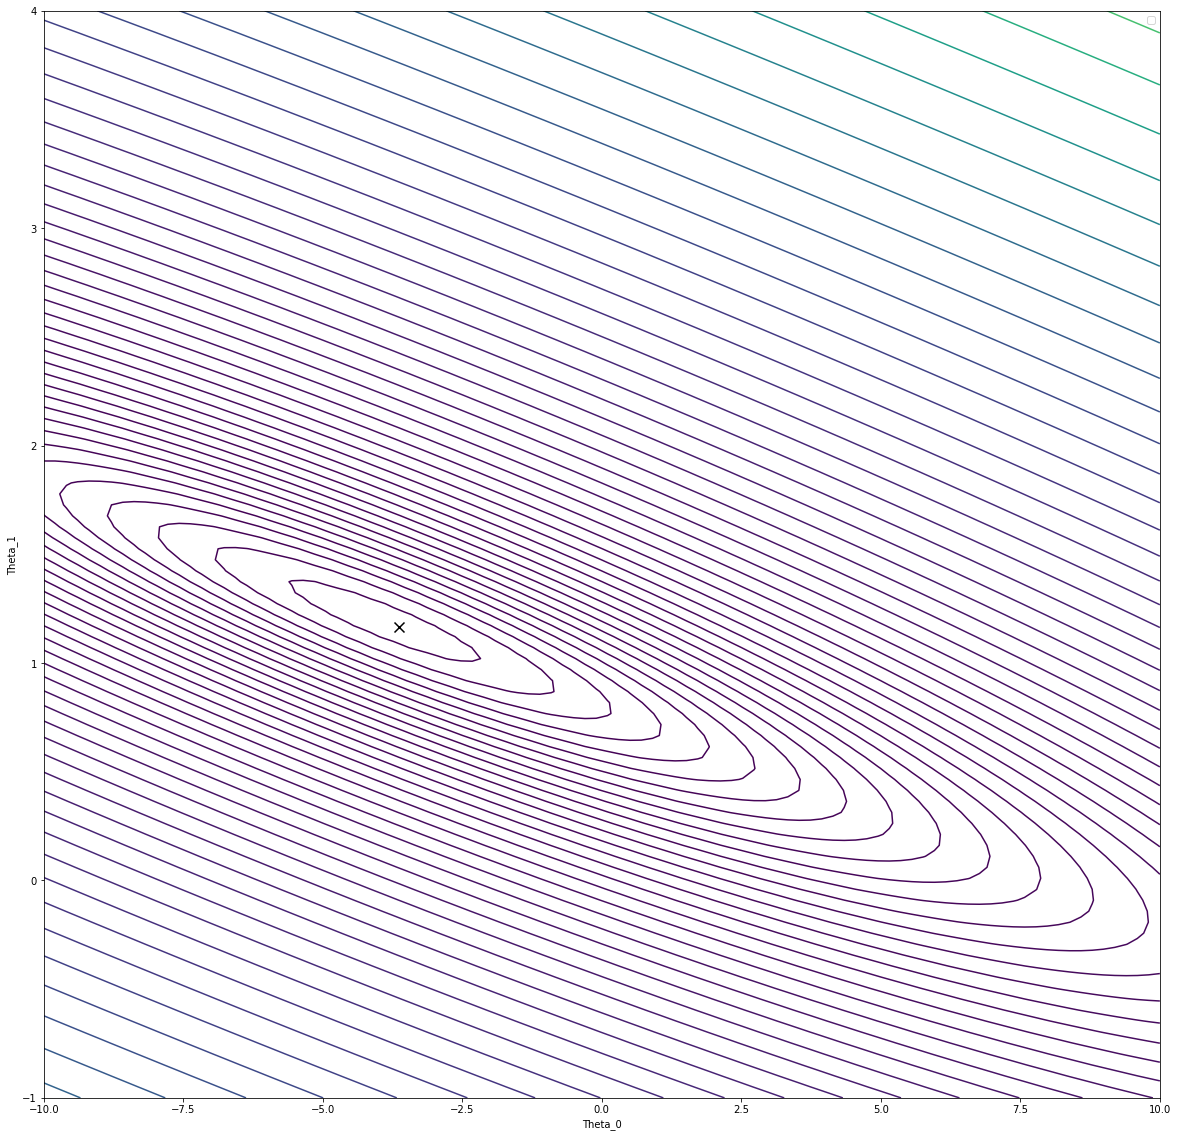

In [16]:
plt.figure(figsize=(20,20))
plt.scatter(theta[0,:], theta[1,:], color = 'black', marker = 'x', s = 100)
plt.legend()
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2,3,100))
plt.xlabel('Theta_0')
plt.ylabel('Theta_1')
plt.show()